### Feature Selection Exercie

In this exercise, we will apply Feature Selection to a Iris flowers dataset, where the target variable is the Species. Essentially, our goal is to identify the features that are most relevant in discerning the species of each Iris flower. The dataset is from: https://www.kaggle.com/datasets/uciml/iris
You can view the demos found in the repository for some methods.

1. Load the dataset from the exercise's Github Repository (Iris.csv)
2. Using buisness logic/common sense, drop features that are surely irrevelvant to the target variable.
3. Preprocess your data (split data into training and testing)
4. Apply feature selection using any 3 (three) different methods:
(Hint) Since the target variable, Species, is categorical, you can apply the numerical methods on the numerical predictor variables against themselves instead to reduce Feature redundancy.
    - Pearson's correlation coefficient (r)
    - Kendall's tau (τ)
    - Mutual Information (MI)
    - Logistic Regression with L1 penalty
    - Any other method/model of Feature Selection....
6. Compare the results of each feature selection method:
    - What features did you manually dropped before applying the feature selection methods? Explain why.
    - Are there any common features selected across multiple methods?
    - Can you explain why certain features were selected based on their characteristics?
(Optional) Visualize the importance of features using techniques like bar charts or heatmaps to make it easier to compare.



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from scipy.stats import kendalltau
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier 

In [2]:
# Loading and preparing data
iris_data = pd.read_csv("Iris.csv")
iris_data = iris_data.dropna()

label_encoder = LabelEncoder()
iris_data["FlowerColour"] = label_encoder.fit_transform(iris_data["FlowerColour"])
iris_data["Species"] = label_encoder.fit_transform(iris_data["Species"])

X = iris_data.drop("Species", axis=1)
y = iris_data["Species"]
X = X.drop(['Id', 'YearCollected', 'MonthCollected'], axis=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
k = 3
y_train_df = pd.DataFrame(y_train, columns=['Target'])
def pearson_corr(X, y):
    return X_train.corrwith(y_train_df['Target']).abs()

selector_r = SelectKBest(score_func=pearson_corr, k=k)
selected_features_r = selector_r.fit(X_train, y_train).get_support(indices=True)

print("Pearson's correlation coefficient (r) features:", X_train.columns[selected_features_r])

Pearson's correlation coefficient (r) features: Index(['PetalWidthCm', 'FlowerColour', 'StigmaLegnth'], dtype='object')


In [5]:
k = 3

tau_values = [abs(kendalltau(X_train[feature], y_train)[0]) for feature in X_train.columns]
selector_tau = SelectKBest(score_func=lambda X, y: (tau_values, [0] * len(tau_values)), k=k)
selected_features_tau = selector_tau.fit(X_train, y_train).get_support(indices=True)

print("Kendall's tau (τ) features:", X_train.columns[selected_features_tau])

Kendall's tau (τ) features: Index(['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [6]:
k = 3

selector_mi = SelectKBest(score_func=mutual_info_classif, k=k)
selected_features_mi = selector_mi.fit(X_train, y_train).get_support(indices=True)

print("Mutual Information (MI) features:", X_train.columns[selected_features_mi])

Mutual Information (MI) features: Index(['PetalLengthCm', 'PetalWidthCm', 'StigmaLegnth'], dtype='object')


In [7]:
k = 3

log_reg = LogisticRegression(penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)
model_lr = SelectFromModel(log_reg, prefit=True)
selected_features_lr = X.columns[model_lr.get_support()]

print("Logistic Regression with L1 penalty features:", selected_features_lr )

Logistic Regression with L1 penalty features: Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'FlowerColour',
       'StigmaLegnth'],
      dtype='object')


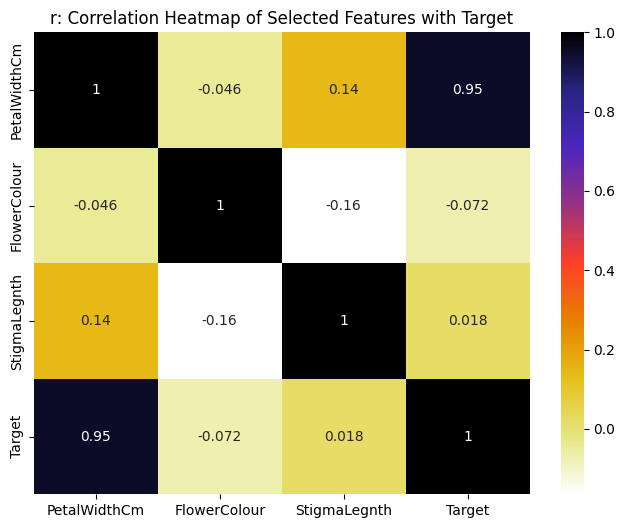

In [8]:
r = X_train[X_train.columns[selected_features_r]].copy()
r['Target'] = y_train
correlation_matrix = r.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('r: Correlation Heatmap of Selected Features with Target')
plt.show()

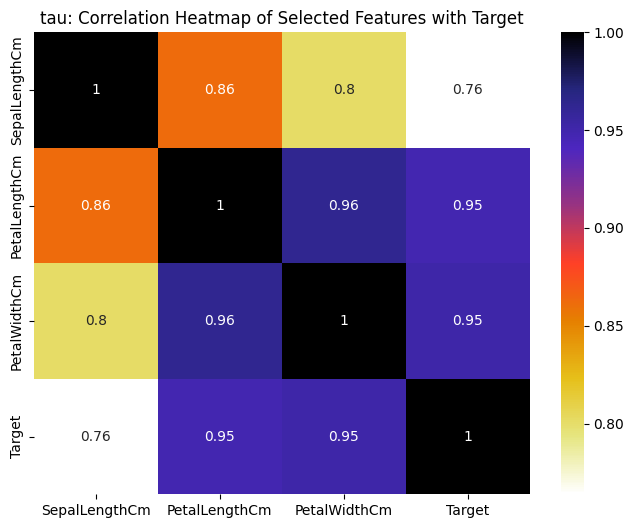

In [9]:
tau = X_train[X_train.columns[selected_features_tau]].copy()
tau['Target'] = y_train
correlation_matrix = tau.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('tau: Correlation Heatmap of Selected Features with Target')
plt.show()

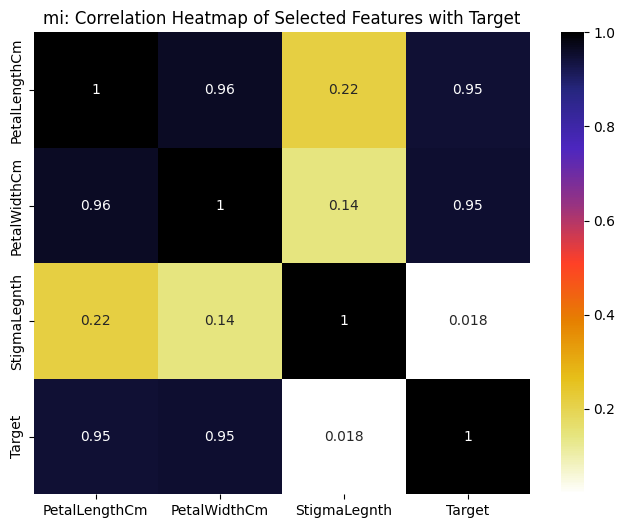

In [10]:
mi = X_train[X_train.columns[selected_features_mi]].copy()
mi['Target'] = y_train
correlation_matrix = mi.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('mi: Correlation Heatmap of Selected Features with Target')
plt.show()


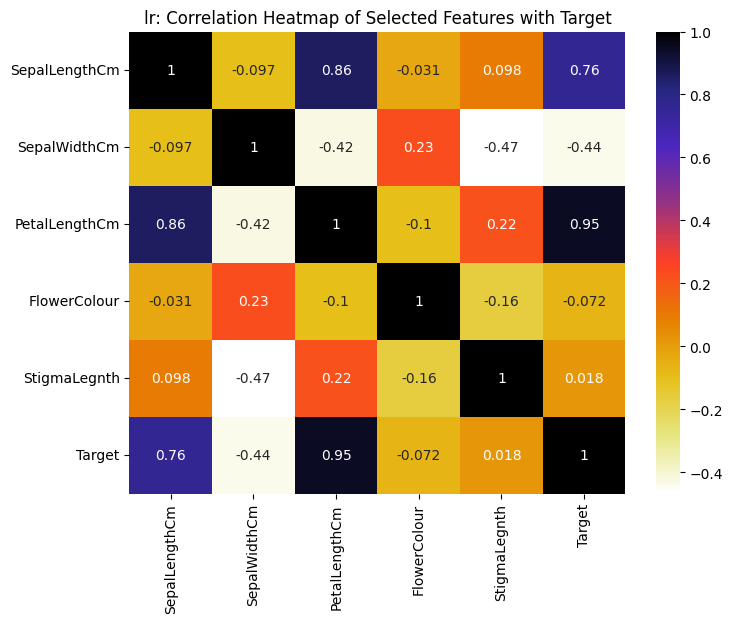

In [11]:
lr = X_train[selected_features_lr].copy()
lr['Target'] = y_train
correlation_matrix = lr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('lr: Correlation Heatmap of Selected Features with Target')
plt.show()

[0.06795006 0.03406995 0.25861965 0.27466686 0.00497916 0.35971432]


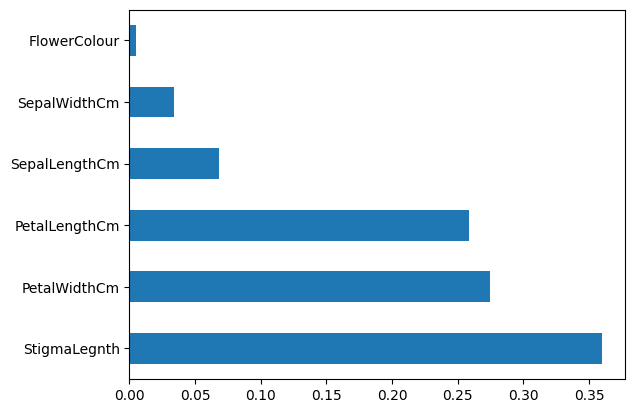

In [12]:
model = ExtraTreesClassifier() 
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(10).plot(kind='barh')
plt.show()